### 4. Scikit-learn

### 4-1. K-Means Clustering

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Only needed if you want to display your plots inline if using Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline

#CSV 파일을 읽어 DataFrame 변수에 저장하기
studentData = pd.read_csv("../dataset/student_middle.csv")

#<class 'pandas.core.frame.DataFrame'>
name = studentData[["NAME"]]
print("name type")
print(type(name))

#<class 'pandas.core.frame.DataFrame'>
features = studentData[["SW","DB","AND"]]
print("features type")
print(type(features))

#Create model and prediction
model = KMeans(n_clusters=2, algorithm="auto")
#머신러닝 - 숫자 형태만 features로 들어가야 함
model.fit(features)
#예측
predict = pd.DataFrame(model.predict(features))
predict.columns=["PREDICT"]

name type
<class 'pandas.core.frame.DataFrame'>
features type
<class 'pandas.core.frame.DataFrame'>


In [9]:
#cncatenate labels to df as a new column / column binding
r = pd.concat([name, features, predict], axis = 1)
r

,NAME,SW,DB,AND,PREDICT
0,ST0001,95,30,0,1
1,ST0002,50,50,0,1
2,ST0003,15,30,15,1
3,ST0004,90,50,20,1
4,ST0005,75,20,20,1
5,ST0006,100,80,30,0
6,ST0007,15,10,30,1
7,ST0008,100,100,33,0
8,ST0009,65,60,35,1
9,ST0010,90,20,38,1


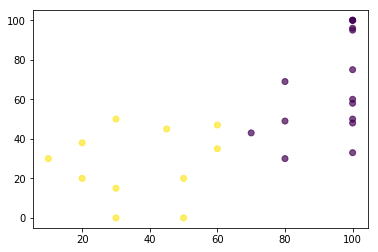

In [12]:
plt.scatter(r['DB'],r["AND"], c=r["PREDICT"], alpha=0.7)

### 4-2. Support Vector Machine

In [18]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
# 키와 몸무게 데이터 읽어 들이기 --- (※1)
tbl = pd.read_csv("../dataset/bmi.csv")
tbl.head()

,height,weight,label
0,140,45,normal
1,145,72,fat
2,150,61,fat
3,137,56,fat
4,192,48,thin


In [22]:
print(tbl.head())

   height  weight   label
0     140      45  normal
1     145      72     fat
2     150      61     fat
3     137      56     fat
4     192      48    thin


In [24]:
# 칼럼(열)을 자르고 정규화하기 --- (※2)
label = tbl["label"]
w = tbl["weight"] / 100 # 최대 100kg라고 가정
h = tbl["height"] / 200 # 최대 200cm라고 가정
wh = pd.concat([w, h], axis=1)

In [23]:
print(wh.head())
np.random.seed(0)

   weight  height
0    0.45   0.700
1    0.72   0.725
2    0.61   0.750
3    0.56   0.685
4    0.48   0.960


###데이터 분류(test/train)

In [31]:
# 학습 전용 데이터와 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = train_test_split(wh, label, test_size = 0.3)

###모델 적용 예측

In [32]:
len(data_train)

14000

In [33]:
len(data_test)

6000

In [25]:
print(len(wh))
print(len(data_train))
print(len(data_test))
data_test.to_csv("d:/test.csv")

20000
14000
6000


In [34]:
# 데이터 학습하기 --- (※4)
model = svm.SVC()
model.fit(data_train, label_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
# 데이터 예측하기 --- (※5)
predict = pd.DataFrame(model.predict(data_test))
predict.columns=["predict"]
print(predict.size)
predict.head()

6000


,predict
0,thin
1,thin
2,fat
3,fat
4,fat


In [40]:
len(predict)

6000

In [39]:
len(data_test)

6000

In [44]:
r = pd.concat([data_test.reset_index(drop=True), label_test.reset_index(drop=True), predict.reset_index(drop=True)], axis = 1)
r.to_csv("./result_bmi.csv")

In [45]:
r.head()

,weight,height,label,predict
0,0.35,0.985,thin,thin
1,0.60,0.910,thin,thin
2,0.68,0.645,fat,fat
3,0.73,0.770,fat,fat
4,0.52,0.620,fat,fat


In [41]:
print(len(r))
print(r.head())

6000
   weight  height label predict
0    0.35   0.985  thin    thin
1    0.60   0.910  thin    thin
2    0.68   0.645   fat     fat
3    0.73   0.770   fat     fat
4    0.52   0.620   fat     fat


In [46]:
# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)

print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 0.9855
리포트 =
              precision    recall  f1-score   support

        fat       1.00      0.99      0.99      2272
     normal       0.96      0.99      0.98      1809
       thin       0.99      0.98      0.98      1919

avg / total       0.99      0.99      0.99      6000



In [47]:
pwd

'C:\\Users\\cj\\Python_CJ_ST\\Session01 - Why Python for Data Analysis'